## Prétraitement de `df_entreprises`

Le prétraitement de `df_entreprises` comprend plusieurs étapes. Voici les tâches préalables de prétraitement :

### Vérification et Correction des Données
- **Vérification des valeurs manquantes** : Inspecter le DataFrame pour identifier et traiter les valeurs manquantes.
- **Suppression des doublons** : Rechercher et éliminer les enregistrements en double pour éviter la redondance.
- **Correction des erreurs** : Analyser les données pour détecter et corriger les erreurs potentielles.

### Normalisation des Textes
Utilisation de la classe `EntreprisePreprocessor` du fichier `prepro_entreprises` pour :
- **`clean_location`** : Standardiser les formats de localisation, en ajustant les majuscules et minuscules.
- **`clean_company_name`** : 
  - Retirer les URL et autres mentions non pertinentes, comme "Home |".
  - Extraire la partie pertinente du nom d'entreprise (par exemple, "Black Kube" de "Home | Black Kube garde meuble et self stockage").
  - Uniformiser les noms pour assurer la cohérence dans les abréviations et les formats (e.g., remplacer 'Demenagement' par 'Déménagement').

### Traitement des Services Proposés
- **Nettoyage** : Nettoyer et préparer les listes de services proposés.
- **One-hot Encoding** : Convertir les listes de services en une série de variables indicatrices pour faciliter l'analyse quantitative (Optiennelle !!!).
- **Extraction d'informations spécifiques** : Identifier et extraire le type de service le plus mentionné pour des analyses ultérieures (classe ::).

### Traitement des URLs
- **Note** : Le traitement spécifique des URLs n'est pas abordé dans cette phase.



In [109]:
# fichier original::: entreprises.csv
import pandas as pd

df_entreprises=pd.read_csv("entreprises.csv")
display(df_entreprises.head())
display(df_entreprises.info())
display(df_entreprises['Entreprise'].unique())

#df_entreprises[df_entreprises['Entreprise']=='Colisweb']

,Entreprise,Url,Location,TrustScore,NombreAvis,ServicesProposes
0,Nextories (ex i-Demenager),https://fr.trustpilot.com/review/nextories.com,"PARIS, France",4.9,3729,"['Entreprise de livraison', 'Service de transp..."
1,La Tournée,https://fr.trustpilot.com/review/www.la-tourne...,"Paris, France",4.9,489,"['Boutique de boissons non alcoolisées', 'Dist..."
2,CartonsDeDemenagement.com,https://fr.trustpilot.com/review/www.cartonsde...,"LIMONEST, France",4.8,11400,"[""Magasin d'articles d'emballage"", ""Magasin d'..."
3,LOCABOX,https://fr.trustpilot.com/review/locabox.fr,"Lormont, France",4.8,7546,"['Centre de stockage', 'Entrepôt', 'Centre de ..."
4,La Tribu du Carton,https://fr.trustpilot.com/review/www.latribudu...,"Vénissieux, France",4.8,5184,"[""Magasin d'articles de déménagement"", ""Magasi..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entreprise        220 non-null    object 
 1   Url               220 non-null    object 
 2   Location          220 non-null    object 
 3   TrustScore        220 non-null    float64
 4   NombreAvis        220 non-null    int64  
 5   ServicesProposes  220 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.4+ KB


None

array(['Nextories (ex i-Demenager)', 'La Tournée',
       'CartonsDeDemenagement.com', 'LOCABOX', 'La Tribu du Carton',
       'Merci Facteur', 'YouStock', 'Lockall', 'papernest', 'Welkit',
       'Ecocarton.fr', 'Zolemba FR', 'Carton Market', 'Cocolis',
       'Paysdesenveloppes.fr', 'Demeclic', 'COLIBACK', 'UBBABIO',
       'Mon-emballage.com', 'BetweenBox', 'Expedomtom', 'Weed Side Story',
       'Happy-Post', 'Packhelp', 'Colicoli', 'ThePackengers', 'Shopiles',
       'ColisExpat', 'FRETBAY', 'Upela', 'Limited Resell',
       'Les déménageurs bretons', 'Parcel Monkey France', 'Lettre24',
       "L'Officiel du déménagement", 'Pakup-Emballage.fr',
       'STLS - Société de Transport, Livraison et Stockage',
       'Green Kartel', 'AirSelli', 'UTOPYA', 'Lessaveursdenoemie',
       'pubensac', 'Best Demenagements', 'Shopopop',
       'Bonjour Demenagement', 'Déménagements Jézéquel', 'Hoplunch',
       'Trustdem - Déménagement pas cher  ', 'Delight Cbd',
       'Sosea_Automotive Logisti

In [110]:
df_entreprises[df_entreprises['Entreprise']=='ID Logistics']

,Entreprise,Url,Location,TrustScore,NombreAvis,ServicesProposes


## Utilisation de la classe :: EntreprisePreprocessor

In [2]:
# exemple d'utilisation de la classe
from prepro_entreprises import EntreprisePreprocessor
# Création de l'instance du préprocesseur
preprocessor = EntreprisePreprocessor()   
# Adapter le préprocesseur
preprocessor.fit(df_entreprises)
# Transformer les données
transformed_df = preprocessor.transform(df_entreprises)
# Afficher le DataFrame transformé
transformed_df.head()


,Entreprise,Url,Location,TrustScore,NombreAvis,ServicesProposes
0,nextories (ex i-demenager),https://fr.trustpilot.com/review/nextories.com,"Paris, France",4.9,3729,"[Entreprise de livraison, Service de transport..."
1,la tournée,https://fr.trustpilot.com/review/www.la-tourne...,"Paris, France",4.9,489,"[Boutique de boissons non alcoolisées, Distrib..."
2,cartonsdedemenagement,https://fr.trustpilot.com/review/www.cartonsde...,"Limonest, France",4.8,11400,"[Magasin d'articles d'emballage, Magasin d'art..."
3,locabox,https://fr.trustpilot.com/review/locabox.fr,"Lormont, France",4.8,7546,"[Centre de stockage, Entrepôt, Centre de stock..."
4,la tribu du carton,https://fr.trustpilot.com/review/www.latribudu...,"Vénissieux, France",4.8,5184,"[Magasin d'articles de déménagement, Magasin d..."


In [3]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 219
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entreprise        216 non-null    object 
 1   Url               216 non-null    object 
 2   Location          216 non-null    object 
 3   TrustScore        216 non-null    float64
 4   NombreAvis        216 non-null    int64  
 5   ServicesProposes  216 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


In [4]:
print(transformed_df['NombreAvis'].unique())

[ 3729   489 11400  7546  5184  2658   886   154  8079  4765  2159   274
 28183  3863  3849  1108  6457    39  3501   351   117  4165  3885   735
 71430  1850  1570 10781  5368  1382   286 10467   607   300  3963   239
   229   142   137   335   107    69    64 13815   647   138   131   125
    54    35    23  3622   328    32    30    18   429   177    14    13
   320    51    16    10   816    90    66    53     9     8     7   129
    97    49    37     6   122     5 11071  4060   297    36     4     3
 77049   214    47 10809  1442   406    12     2    25     1  2282   521
 23579  6604   161     0 80643   535   266    43   235    46  2859    99
   303   166  3748   246  9477  4171  7032 13853   801]


In [60]:
print(transformed_df['Entreprise'].unique())

['nextories (ex i-demenager)' 'la tournée' 'cartonsdedemenagement'
 'locabox' 'la tribu du carton' 'merci facteur' 'youstock' 'lockall'
 'papernest' 'welkit' 'ecocarton' 'zolemba fr' 'carton market' 'cocolis'
 'paysdesenveloppes' 'demeclic' 'coliback' 'ubbabio' 'mon-emballage'
 'betweenbox' 'expedomtom' 'weed side story' 'happy-post' 'packhelp'
 'colicoli' 'thepackengers' 'shopiles' 'colisexpat' 'fretbay' 'upela'
 'limited resell' 'les déménageurs bretons' 'parcel monkey france'
 'lettre24' "l'officiel du déménagement" 'pakup-emballage'
 'stls - société de transport, livraison et stockage' 'green kartel'
 'airselli' 'utopya' 'lessaveursdenoemie' 'pubensac' 'best demenagements'
 'shopopop' 'bonjour demenagement' 'déménagements jézéquel' 'hoplunch'
 'trustdem - déménagement pas cher' 'delight cbd'
 'sosea_automotive logistics' 'fraise' 'warning group' 'tpop'
 'excello mobilis déménagement' 'cafeographe' 'jenlevejelivre' 'tut-tut'
 'kingbox' 'maison cocktail' 'asntransport paris' 'bring4y

In [5]:
print(transformed_df[transformed_df['NombreAvis']==0])

                                   Entreprise  \
140                                 speedydem   
141          meilleur demenageur-demenagement   
142  black kube garde meuble et self stockage   
143                                 toncarton   
176                          pro demenagement   
177                                 ineo pack   
178                      demenagement blondel   
179                         le roy logistique   
180                      logistics operations   
181                                  takeaway   
182                                     hipli   
183                                    sechim   
184                 schoeller allibert france   
185                          bigbagcenter sas   
186                                     bundd   
187                                 springare   
188                                day agency   
189                                  instavan   
190                              shippinghero   
191                 

In [6]:
df_entreprise_reduit=transformed_df[['Entreprise','ServicesProposes']]

In [7]:
df_entreprise_reduit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 219
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Entreprise        216 non-null    object
 1   ServicesProposes  216 non-null    object
dtypes: object(2)
memory usage: 5.1+ KB


## Utilisation de la Classe `Geocoder`

Dans la classe `Geocoder`, nous récupérons les coordonnées géographiques afin de visualiser sur une carte la localisation de chaque entreprise.

### Processus de Récupération des Coordonnées
Pour chaque adresse présente dans la colonne `Location` du DataFrame, la classe `Geocoder` effectue les opérations suivantes :
- **Récupération des coordonnées** : Extraction des coordonnées (latitude et longitude) associées à chaque adresse.
- ** Ajouetr les coorrdonnée dans deux colonnes dans notre data frame 

In [95]:
# je travail sur la calsse déjà crerr
from Geocodification import Geocoder

# Create an instance of the Geocoder / pour obtenire les corrdonnes ()
geocodonnees = Geocoder(user_agent="test_app")
 # Test adding coordinates to the DataFrame
geocodonnees.add_coordinates(df_entreprises)
df_entreprises.head()



,Entreprise,Url,Location,TrustScore,NombreAvis,ServicesProposes,Latitude,Longitude
0,Nextories (ex i-Demenager),https://fr.trustpilot.com/review/nextories.com,"PARIS, France",4.9,3729,"['Entreprise de livraison', 'Service de transp...",48.858890,2.320041
1,La Tournée,https://fr.trustpilot.com/review/www.la-tourne...,"Paris, France",4.9,489,"['Boutique de boissons non alcoolisées', 'Dist...",48.858890,2.320041
2,CartonsDeDemenagement.com,https://fr.trustpilot.com/review/www.cartonsde...,"LIMONEST, France",4.8,11400,"[""Magasin d'articles d'emballage"", ""Magasin d'...",45.835670,4.770834
3,LOCABOX,https://fr.trustpilot.com/review/locabox.fr,"Lormont, France",4.8,7546,"['Centre de stockage', 'Entrepôt', 'Centre de ...",44.879171,-0.521668
4,La Tribu du Carton,https://fr.trustpilot.com/review/www.latribudu...,"Vénissieux, France",4.8,5184,"[""Magasin d'articles de déménagement"", ""Magasi...",45.697711,4.885597


## Utilisation de la Classe `VisualisationGeneral`


**Visualisation sur Carte** : Utilisation des coordonnées récupérées pour placer des marqueurs sur une carte, représentant la localisation géographique de chaque entreprise.

Ce processus permet une visualisation intuitive de la distribution géographique des entreprises, facilitant ainsi des analyses spatiales plus approfondies.

**Visualisation** 'Nombre d\'entreprises par Ville avec plot_bar_chart

**Visualisation** Trace un diagramme en barres des top_n services les plus utilisés par les entreprises par plot_bar_chart_services   


In [96]:
# ici soit la data frame df_entreprises/ soit avec transformed_df
from VisualisationMap import VisualisationGeneral
print(df_entreprises.info())
print(df_entreprises.isna().sum())
# attention le data ne doit pas avoir des valeurs manquant dans les colonnes Latitude', 'Longitude et  Location
valid_data = df_entreprises.dropna(subset=['Latitude', 'Longitude'])
map_obj = VisualisationGeneral.plot_map(valid_data, popup_column='Location')
display(map_obj)
if map_obj:
   map_obj.save('map.html')
else:
    print("Aucune donnée valide pour créer la carte.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entreprise        220 non-null    object 
 1   Url               220 non-null    object 
 2   Location          220 non-null    object 
 3   TrustScore        220 non-null    float64
 4   NombreAvis        220 non-null    int64  
 5   ServicesProposes  220 non-null    object 
 6   Latitude          218 non-null    float64
 7   Longitude         218 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 13.9+ KB
None
Entreprise          0
Url                 0
Location            0
TrustScore          0
NombreAvis          0
ServicesProposes    0
Latitude            2
Longitude           2
dtype: int64


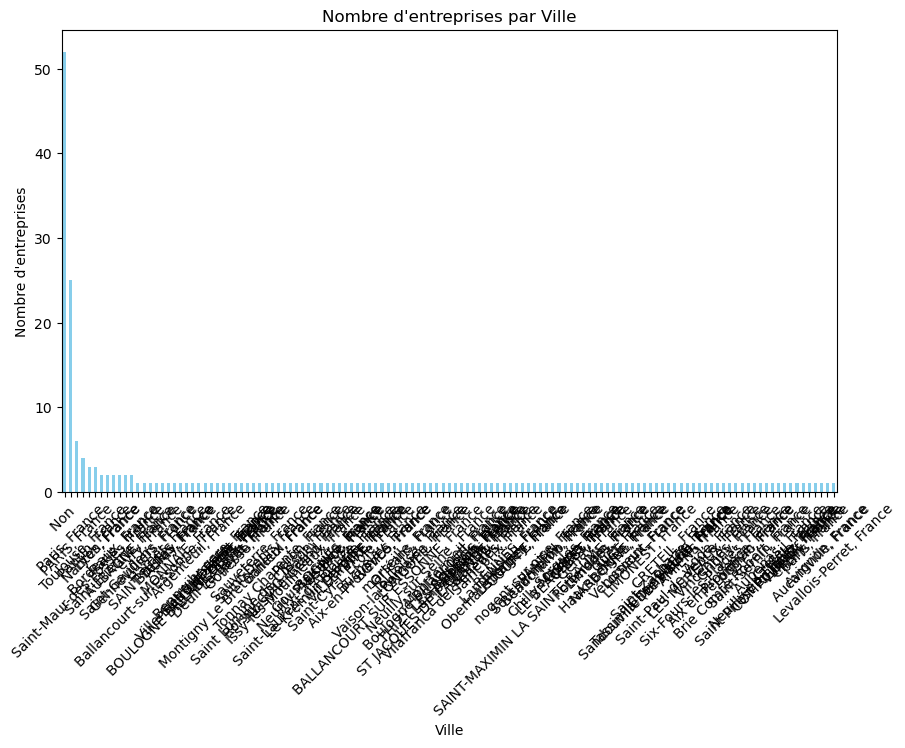

In [98]:
# classe de visualisation 

location_counts = df_entreprises['Location'].value_counts()
VisualisationGeneral.plot_bar_chart(location_counts)




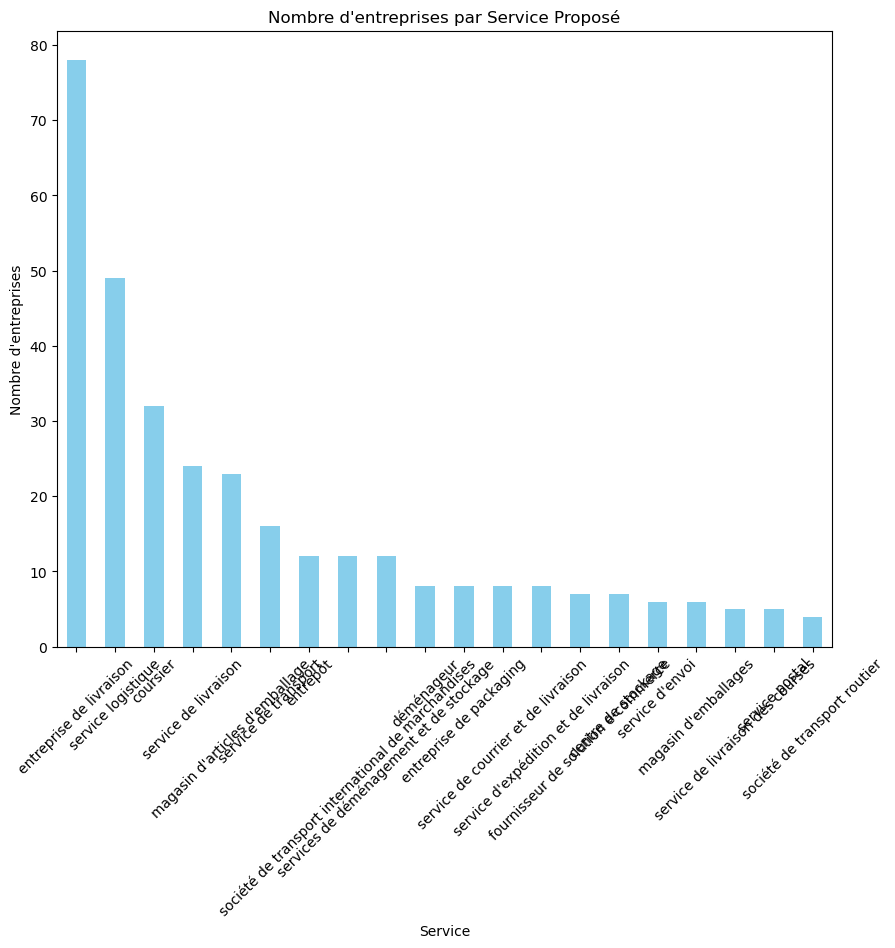

In [99]:
# ici on a besoin à utiliser la transformed_df pour les colonnes ajouté par One-hot Encoding 
# 20 top 20 entrprise  ayant le Nombre de services les plus utilisés à afficher dans le diagramme
VisualisationGeneral.plot_bar_chart_services(transformed_df,20)


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


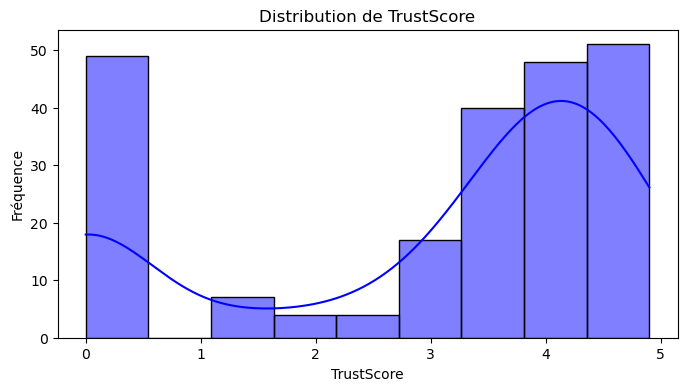

In [101]:
VisualisationGeneral.histogramme_trustScore(transformed_df['TrustScore']);

In [ ]:
# je garde le dataframe dans ficher csv df_Intreprise_preprocessing.csv .

In [102]:

transformed_df.to_csv('df_Intreprise_preprocessing.csv', index=False)

In [ ]:
### Partie concernant la deuxième DataFrame : `avis.csv`

In [14]:
# Orginal data frame
df_avis = pd.read_csv("avis.csv")
display(df_avis.head())
display(df_avis.info())

display(df_avis.isna().sum())

,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris
0,2ATPS,Agathe,1,FR,5,2023-12-08T10:45:35.000Z,Personnel réactif !!!,Personnel réactif !!!! entreprise sérieuse qui...,Non
1,2htransports.com,Alexandre Rif,2,FR,5,2024-04-08T01:40:55.000Z,J'ai demandé un transport pour aller de…,J'ai demandé un transport pour aller de Paris ...,Non
2,2htransports.com,Game Lu,1,FR,5,2024-03-09T22:26:36.000Z,J'ai trouvé cette société de…,J'ai trouvé cette société de transporteur un p...,Non
3,2htransports.com,SaYoSurMC,1,FR,5,2023-02-16T23:30:42.000Z,Si vous recherchez un service de…,Si vous recherchez un service de coursier prof...,Non
4,2htransports.com,S D,2,FR,1,2023-10-03T23:01:28.000Z,Ce Monsieur nous a flingué une mission…,Ce Monsieur nous a flingué une mission humanit...,"Bonjour MD,Je suis désolé d'entendre votre déc..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505129 entries, 0 to 505128
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    505129 non-null  object
 1   Nom_Client        505118 non-null  object
 2   Nombre_avis       505129 non-null  int64 
 3   Pays              505128 non-null  object
 4   Note              505129 non-null  int64 
 5   Date              505129 non-null  object
 6   Titre_avis        505125 non-null  object
 7   Contenu_avis      505129 non-null  object
 8   Réponse_Entrpris  505129 non-null  object
dtypes: int64(2), object(7)
memory usage: 34.7+ MB


None

Nom_Entreprise       0
Nom_Client          11
Nombre_avis          0
Pays                 1
Note                 0
Date                 0
Titre_avis           4
Contenu_avis         0
Réponse_Entrpris     0
dtype: int64

# calsse créee AvisPreprocessor

## Description de la Classe `AvisPreprocessor`

La classe `AvisPreprocessor` est conçue pour prétraiter et transformer des données d'avis clients de manière structurée et automatisée. Héritant de `BaseEstimator` et `TransformerMixin` de scikit-learn, cette classe s'intègre facilement dans des pipelines de traitement de données machine learning et permet une personnalisation étendue grâce à ses méthodes modulaires. Elle offre des fonctionnalités complètes pour le nettoyage, la transformation et l'analyse des avis.

### Fonctionnalités Principales

- **Nettoyage de Texte**: Les champs textuels tels que le nom de l'entreprise, le nom du client, le titre et le contenu de l'avis sont nettoyés pour enlever les caractères indésirables et normaliser le texte, en utilisant la classe `EntreprisePreprocessor`.

- **Gestion des Valeurs Manquantes**: Les valeurs manquantes dans des colonnes clés comme 'Pays' sont remplacées par une valeur par défaut ('Inconnu') pour maintenir l'intégrité des données.

- **Extraction de Caractéristiques Temporelles**: Des caractéristiques telles que l'année, le mois, le jour de la semaine, et l'heure sont extraites à partir des champs de date pour enrichir les données d'avis avec des informations temporelles qui pourraient influencer l'analyse des tendances.


- **Détection de Langue**: La langue du contenu de l'avis est détectée pour filtrer les avis selon la langue cible (français dans ce cas), ce qui est crucial pour les opérations de traitement de texte ultérieures qui dépendent de la langue.



# exemple d'application 


In [16]:
from Prepro_avis import AvisPreprocessor

# Création de l'instance du préprocesseur
preprocessor = AvisPreprocessor()
# Application de la méthode transform pour tester
df_avis = preprocessor.transform(df_avis)

display(df_avis.head())
display(df_avis.info())
display(df_avis.isna().sum())
## ce nest pas la peine de tester je telecharge la data frame produite lors de l'autoteste 

[nltk_data] Downloading package vader_lexicon to C:\Users\Youcef
[nltk_data]     Labib\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyboardInterrupt: 

In [17]:

df_avis = pd.read_csv("df_avis_Preprocessing1.csv")
display(df_avis.head())
display(df_avis.info())

display(df_avis.isna().sum())




,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris,year,month,weekday,weekend,day,hour,Langue
0,2atps,agathe,1,FR,5,2023-12-08 10:45:35+00:00,personnel réactif !!!,personnel réactif !!!! entreprise sérieuse qui...,Non,2023,12,4,0,8,10,fr
1,2htransports,alexandre rif,2,FR,5,2024-04-08 01:40:55+00:00,j'ai demandé un transport pour aller de…,j'ai demandé un transport pour aller de paris ...,Non,2024,4,0,0,8,1,fr
2,2htransports,game lu,1,FR,5,2024-03-09 22:26:36+00:00,j'ai trouvé cette société de…,j'ai trouvé cette société de transporteur un p...,Non,2024,3,5,1,9,22,fr
3,2htransports,sayosurmc,1,FR,5,2023-02-16 23:30:42+00:00,si vous recherchez un service de…,si vous recherchez un service de coursier prof...,Non,2023,2,3,0,16,23,fr
4,2htransports,s d,2,FR,1,2023-10-03 23:01:28+00:00,ce monsieur nous a flingué une mission…,ce monsieur nous a flingué une mission humanit...,"Bonjour MD,Je suis désolé d'entendre votre déc...",2023,10,1,0,3,23,fr


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487824 entries, 0 to 487823
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    487683 non-null  object
 1   Nom_Client        487756 non-null  object
 2   Nombre_avis       487824 non-null  int64 
 3   Pays              487824 non-null  object
 4   Note              487824 non-null  int64 
 5   Date              487824 non-null  object
 6   Titre_avis        487779 non-null  object
 7   Contenu_avis      487824 non-null  object
 8   Réponse_Entrpris  487824 non-null  object
 9   year              487824 non-null  int64 
 10  month             487824 non-null  int64 
 11  weekday           487824 non-null  int64 
 12  weekend           487824 non-null  int64 
 13  day               487824 non-null  int64 
 14  hour              487824 non-null  int64 
 15  Langue            487824 non-null  object
dtypes: int64(8), object(8)
memory usage: 5

None

Nom_Entreprise      141
Nom_Client           68
Nombre_avis           0
Pays                  0
Note                  0
Date                  0
Titre_avis           45
Contenu_avis          0
Réponse_Entrpris      0
year                  0
month                 0
weekday               0
weekend               0
day                   0
hour                  0
Langue                0
dtype: int64


 ## Classe `TextMiningProcessus`
 **Nb:: Cette classe a besoin un data frame contient la clonne de serviceProposer afin que Latent Dirichlet Allocation (LDA) fonction:
 ** J'ai déja fait un jointure avec data frame entreprise pour ajouetr ce colonne .
 ** la cellule suivante faite un description de la classe  et la celulle apres je vait alimenter cette classe un data frame ayant la colonne service proposer. 


## Description de la Classe `TextMiningProcessus`

La classe `TextMiningProcessus` est conçue  pour le traitement et l'analyse des avis clients. Elle offre une suite complète de méthodes pour la préparation des données textuelles, leur analyse et la transformation en informations utilisables pour des analyses plus poussées ou pour alimenter des modèles de machine learning.

### Fonctionnalités Principales

- **Analyse de Sentiment**: L'analyse de sentiment est réalisée sur le contenu de l'avis en utilisant l'outil VADER intégré à NLTK, qui est particulièrement efficace pour les textes issus des réseaux sociaux en raison de sa sensibilité aux émoticônes et aux intensificateurs.

- ****Traitement des Emojis et les ponctuations****: Nettoie et prépare les données textuelles pour l'analyse en extrayant les caractéristiques pertinentes telles que les emojis, les ponctuations, et en calculant diverses métriques textuelles.


- **Latent Dirichlet Allocation (LDA)**: Application de LDA pour la modélisation de sujets afin d'identifier les thèmes récurrents dans les ensembles de textes, utile pour comprendre les aspects clés discutés dans les avis.

### Avantages

- **Modularité et Extensibilité**: Grâce à son architecture modulaire, cette classe peut être facilement étendue ou adaptée pour inclure de nouvelles méthodes de prétraitement ou d'analyse, la rendant adaptable à divers besoins analytiques.

- **Intégration Facile**: Conçue pour être intégrée facilement avec d'autres outils de traitement de données en Python, facilitant ainsi la création de pipelines de traitement de données robustes.

- **Efficacité**: Optimisée pour traiter efficacement de grandes quantités de données textuelles, assurant une exécution rapide même avec des ensembles de données volumineux.


## Ponctuations dans les commentaires des clients

Les ponctuations dans les commentaires des clients jouent plusieurs rôles cruciaux dans l'analyse de texte, notamment en influençant le ton, le rythme et l'émotion exprimée.

Voici quelques façons dont les ponctuations peuvent être utilisées en tant que feature engineering pour enrichir vos modèles de traitement du langage naturel (NLP) :

### 1. Ton et Sentiments

Les ponctuations peuvent influencer considérablement l'interprétation des sentiments et des émotions dans un texte. Par exemple, les points d'exclamation peuvent indiquer un enthousiasme ou une urgence, tandis que les points d'interrogation peuvent suggérer une incertitude ou une confusion. Utiliser ces caractères pour aider à évaluer le sentiment général d'un commentaire peut être très utile.

**Features potentielles :**

- **Comptage des points d'exclamation** : Nombre de points d'exclamation par commentaire pour mesurer l'intensité de l'émotion.
- **Comptage des points d'interrogation** : Nombre de points d'interrogation pour évaluer l'incertitude ou la curiosité du client.

### 2. Structure du Texte

Les ponctuations comme les virgules, les points-virgules et les deux-points jouent un rôle dans la structuration des phrases. Ils peuvent indiquer la complexité du texte et sont souvent utilisés pour clarifier le sens, séparer les éléments ou ajouter des informations supplémentaires.

**Features potentielles :**

- **Ratio de ponctuations par mot** : Mesurer le ratio total de ponctuations par rapport au nombre de mots dans un commentaire pour évaluer la complexité du texte.
- **Diversité des ponctuations** : Évaluer le nombre de types différents de ponctuations utilisés, ce qui peut donner des indications sur le style d'écriture ou le niveau d'éducation du client.

### 3. Pause et Emphase

Les ponctuations comme les ellipses (...) ou les tirets (-) peuvent indiquer une pause dans la pensée ou une emphase. Ces éléments peuvent être particulièrement utiles pour comprendre comment les clients expriment leurs pensées ou leurs hésitations.

**Features potentielles :**

- **Fréquence des ellipses** : Compter le nombre d'ellipses dans les commentaires pour détecter des pauses ou des prolongements dans le discours.
- **Fréquence des tirets** : Utilisation des tirets pour mesurer l'emphase ou l'ajout d'informations supplémentaires.

### 4. Expression Informelle ou Urgente

L'utilisation répétée de certaines ponctuations comme les points d'exclamation multiples (!!!) ou les combinaisons de points d'interrogation et d'exclamation (?! ou !?) peut indiquer un langage plus informel ou une expression urgente de sentiments.

**Features potentielles :**

- **Séquences de ponctuations** : Identifier et compter les occurrences de séquences spécifiques de ponctuations pour mesurer l'intensité émotionnelle ou l'urgence.

## le nombre de mots écrits en majuscules ou en minuscules

le nombre de mots écrits en majuscules ou en minuscules peut jouer un rôle **significatif dans l'analyse des commentaires des client**, surtout dans le cadre de **l'analyse de sentiments** ou de **l'analyse de l'expression émotionnelle**. Voici quelques points clés sur l'impact de l'utilisation des majuscules et des minuscules dans les commentaires :

1.**Expression Émotionnelle** : Les mots en majuscules sont souvent utilisés pour exprimer une forte émotion. Par exemple, l'utilisation intensive de majuscules peut indiquer un cri ou une intensité élevée, ce qui est fréquent dans les expressions de colère, d'excitation, ou d'urgence.

2.**Accentuation** : Les mots en majuscules peuvent servir à accentuer certains mots ou phrases, donnant un indice sur les aspects du produit ou du service que le client trouve particulièrement notables.

3.**Style de Communication** : L'usage des majuscules ou des minuscules peut aussi refléter un style de communication particulier. Par exemple, certains clients peuvent écrire en majuscules pour attirer l'attention sur leur commentaire, tandis que d'autres peuvent utiliser un style tout en minuscules pour une approche plus décontractée ou informelle.

4.**Analyse de Sentiments** : Les analyses de sentiments peuvent être affinées en observant l'utilisation des majuscules. Des études ont montré que les commentaires avec un grand nombre de mots en majuscules peuvent souvent indiquer des sentiments extrêmes, qu'ils soient positifs ou négatifs.

## Feature Engineering pour l'Analyse des Commentaires

Pour exploiter ces observations dans l'analyse des données, voici quelques caractéristiques (features) que vous pourriez extraire et utiliser dans vos modèles de traitement automatique du langage naturel (NLP) :

1.**Compte des Mots en Majuscules** : Calculer le nombre de mots entièrement en majuscules dans chaque commentaire **pour mesurer l'intensité de l'expression**.

2.**Ratio de Mots en Majuscules** : Évaluer le ratio de mots en majuscules par rapport au nombre total de mots pour **détecter le niveau d'accentuation dans le texte**.

3.**Présence de Mots en Majuscules Spécifiques** : Identifier et compter la fréquence de mots spécifiques en majuscules **qui sont souvent associés à des sentiments forts ou à des appels à l'action**.

Ces caractéristiques peuvent être intégrées dans des modèles d'apprentissage automatique pour **améliorer la compréhension et la classification des sentiments** et **des intentions derrière les commentaires des clients**.

## Les emojis peuvent apporter une dimension supplémentaire de sentiment et d'émotion dans le traitement du langage naturel (NLP)

Les emojis peuvent apporter une dimension supplémentaire de sentiment et d'émotion dans le traitement du langage naturel (NLP), notamment dans **les analyses de texte** où le contexte émotionnel **est important**, comme l'analyse des sentiments sur les réseaux sociaux ou les avis clients. Voici quelques caractéristiques (features) que vous pourriez extraire des emojis pour enrichir vos modèles NLP :

**Fréquence des Emojis** :
-.**Nombre total d'emojis** : Compter le nombre total d'emojis dans un texte peut donner **une indication de l'expressivité émotionnelle** ou de **l'enthousiasme de l'auteur**.
-.**Types d'emojis** : Compter le nombre de différents types d'emojis utilisés peut aider à comprendre la diversité des expressions émotionnelles.

**Emojis Spécifiques** :
-.**Sentiments Positifs ou Négatifs** : Identifier et compter les emojis qui sont généralement associés à des sentiments positifs (😊, ❤️) ou négatifs (😢, 😠) pour aider à déterminer le ton général du texte.
-.**Emojis fréquemment utilisés** : Identifier les emojis les plus fréquemment utilisés peut révéler des tendances dans l'expression des sentiments ou des réactions culturelles spécifiques.

**Contexte des Emojis** :
-.**Position des Emojis dans le Texte** : Analyser où les emojis apparaissent dans le texte (début, milieu, fin) pour voir comment ils pourraient influencer l'interprétation du message entier.
-.**Association des Emojis avec des Mots** : Examiner les mots fréquemment utilisés à proximité des emojis pour comprendre le contexte dans lequel ces emojis sont utilisés.

**Conversion des Emojis en Texte** :
-.**Texte Descriptif des Emojis** : Convertir les emojis en texte descriptif (par exemple, 😊 en "visage souriant") pour permettre une analyse textuelle plus traditionnelle et incorporer cette information dans des modèles basés sur du texte.

**Analyse de Sentiment avec Emojis** :
-.**Impact des Emojis sur le Sentiment** : Évaluer comment la présence d'emojis affecte le sentiment perçu d'un message. Par exemple, un texte neutre pourrait être perçu comme plus positif si accompagné d'emojis joyeux.

**Traits d'Emoji**:
-.**Catégorisation des Emojis** : Classer les emojis selon des traits émotionnels ou sémantiques (joie, tristesse, colère, surprise, etc.) et utiliser ces catégories comme features pour le modèle.

Intégrer ces caractéristiques dans vos modèles NLP peut aider **à améliorer la compréhension du texte**, surtout dans les environnements où les nuances émotionnelles sont cruciales pour l'interprétation correcte du message.



******ATTESNTION*****
il sera nécessaire de modifier l'échelle des données, qui sont a priori assez différente

Pour utiliser un modèle de sentiment externe ou construire une liste personnalisée de sentiments associés à certains emojis, voici quelques approches possibles :
Utilisation d'un Modèle de Sentiment Externe

    API de Sentiment : Intégrer une API externe comme Google Cloud Natural Language ou Microsoft Azure Text Analytics, qui peuvent analyser le sentiment de textes. Ces services peuvent traiter le texte des emojis converti pour en déduire un score de sentiment plus nuancé.

    Bibliothèques de Traitement du Langage Naturel : Utiliser des bibliothèques comme TextBlob ou VADER en Python, qui sont capables de fournir un score de sentiment directement à partir du texte. Ces outils sont souvent pré-entraînés sur des données volumineuses et peuvent offrir une bonne approximation du sentiment sans besoin de configuration supplémentaire.

    python

    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

    def emoji_sentiment_vader(emoji_texts):
        analyzer = SentimentIntensityAnalyzer()
        sentiment_result = analyzer.polarity_scores(emoji_texts)
        return sentiment_result['compound']  # Retourne le score composite qui combine positif, négatif et neutre

Construction d'une Liste Prédéfinie Personnalisée

    Analyse Manuelle : Examiner manuellement une grande quantité de données contenant des emojis et leurs contextes pour déterminer les sentiments généralement associés à chaque emoji. Cela nécessite un effort significatif mais peut conduire à des résultats très adaptés à vos données spécifiques.

    Feedback Utilisateur : Collecter des feedbacks des utilisateurs sur ce qu'ils pensent que certains emojis représentent en termes de sentiments. Cela peut être fait via des enquêtes où les utilisateurs sont invités à associer des sentiments à des emojis.

    Exploitation des Ressources Existantes : Utiliser des recherches et des études existantes qui ont analysé les sentiments des emojis. Par exemple, des études en psychologie ou en communication qui ont exploré comment les gens interprètent les emojis.

    Apprentissage Automatique : Créer un modèle d'apprentissage automatique en utilisant comme caractéristiques les emojis et comme labels les sentiments exprimés dans les textes qui les accompagnent. Cela pourrait nécessiter de collecter un ensemble de données annoté où chaque emoji est étiqueté avec un sentiment.

In [ ]:
"""
# Jointure des DataFrames
df_entreprise_reduit=df_entreprise_reduit.rename(columns={'Entreprise':'Nom_Entreprise'})
df_entreprise_reduit.head()
# Jointure des DataFrames sur la colonne 'Entreprise'
df_combined = pd.merge(df_avis, df_entreprise_reduit, on='Nom_Entreprise', how='left')
# Afficher les informations du DataFrame combiné pour vérifier la jointure
print(df_combined.info())
stoker la data frame  df_avis_jointure.csv
df_combined.to_csv('df_avis_jointure.csv', index=False)
"""

In [18]:
df_avis_Mdified = pd.read_csv("df_avis_jointure.csv")

In [20]:
display(df_avis_Mdified.head())
display(df_avis_Mdified.info())

,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris,year,month,weekday,weekend,day,hour,Langue,ServicesProposes
0,2atps,agathe,1,FR,5,2023-12-08 10:45:35+00:00,personnel réactif !!!,personnel réactif !!!! entreprise sérieuse qui...,Non,2023,12,4,0,8,10,fr,"['Service de livraison des courses', 'Service ..."
1,2htransports,alexandre rif,2,FR,5,2024-04-08 01:40:55+00:00,j'ai demandé un transport pour aller de…,j'ai demandé un transport pour aller de paris ...,Non,2024,4,0,0,8,1,fr,"['Coursier', 'Société de transport internation..."
2,2htransports,game lu,1,FR,5,2024-03-09 22:26:36+00:00,j'ai trouvé cette société de…,j'ai trouvé cette société de transporteur un p...,Non,2024,3,5,1,9,22,fr,"['Coursier', 'Société de transport internation..."
3,2htransports,sayosurmc,1,FR,5,2023-02-16 23:30:42+00:00,si vous recherchez un service de…,si vous recherchez un service de coursier prof...,Non,2023,2,3,0,16,23,fr,"['Coursier', 'Société de transport internation..."
4,2htransports,s d,2,FR,1,2023-10-03 23:01:28+00:00,ce monsieur nous a flingué une mission…,ce monsieur nous a flingué une mission humanit...,"Bonjour MD,Je suis désolé d'entendre votre déc...",2023,10,1,0,3,23,fr,"['Coursier', 'Société de transport internation..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487832 entries, 0 to 487831
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    487691 non-null  object
 1   Nom_Client        487764 non-null  object
 2   Nombre_avis       487832 non-null  int64 
 3   Pays              487832 non-null  object
 4   Note              487832 non-null  int64 
 5   Date              487832 non-null  object
 6   Titre_avis        487787 non-null  object
 7   Contenu_avis      487832 non-null  object
 8   Réponse_Entrpris  487832 non-null  object
 9   year              487832 non-null  int64 
 10  month             487832 non-null  int64 
 11  weekday           487832 non-null  int64 
 12  weekend           487832 non-null  int64 
 13  day               487832 non-null  int64 
 14  hour              487832 non-null  int64 
 15  Langue            487832 non-null  object
 16  ServicesProposes  487832 non-null  obj

None

In [ ]:
# exmeple d'application de cette calsse ::
"""
df_avis_class_test = pd.read_csv("df_avis_jointure.csv")
text_processor = TextMiningProcessus(df_avis_class_test, 'Contenu_avis')
results = text_processor.preprocess_Data_Extraction(use_lda=True)
if isinstance(results, tuple):
    processed_df, lda_model = results  # Séparer le DataFrame et le modèle LDA
else:
    processed_df = results  # Aucun modèle LDA retourné, seul le DataFrame est retourné

# Maintenant vous pouvez utiliser la méthode head() sur le DataFrame correctement
print(processed_df.head())
processed_df.to_csv('df_avis_TexteMining.csv', index=False)
"""

In [ ]:
# continuation avec l'output de la classe :::: df_avis_TexteMining.csv

In [21]:
df_avis2 = pd.read_csv("df_avis_TexteMining.csv")
display(df_avis2.head())
display(df_avis2.info())

display(df_avis2.isna().sum())

,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris,year,...,quotes,parentheses,combined_punctuation,uppercase_words,lowercase_words,uppercase_ratio,lowercase_ratio,topics,dominant_topic_id,dominant_service_topic
0,2atps,agathe,1,FR,5,2023-12-08 10:45:35+00:00,personnel réactif !!!,personnel réactif !!!! entreprise sérieuse qui...,Non,2023,...,0,0,0,0,11,0.0,0.916667,"[(0, 0.015919503), (1, 0.43787825), (2, 0.1280...",1,"['Magasin de matériel de camping', 'Service lo..."
1,2htransports,alexandre rif,2,FR,5,2024-04-08 01:40:55+00:00,j'ai demandé un transport pour aller de…,j'ai demandé un transport pour aller de paris ...,Non,2024,...,3,0,0,0,22,0.0,1.000000,"[(0, 0.3877065), (1, 0.39804453), (4, 0.196680...",1,"['Magasin de matériel de camping', 'Service lo..."
2,2htransports,game lu,1,FR,5,2024-03-09 22:26:36+00:00,j'ai trouvé cette société de…,j'ai trouvé cette société de transporteur un p...,Non,2024,...,1,0,0,0,24,0.0,1.000000,"[(0, 0.36660075), (1, 0.4849809), (2, 0.047657...",1,"['Magasin de matériel de camping', 'Service lo..."
3,2htransports,sayosurmc,1,FR,5,2023-02-16 23:30:42+00:00,si vous recherchez un service de…,si vous recherchez un service de coursier prof...,Non,2023,...,5,0,0,0,103,0.0,0.990385,"[(0, 0.40743735), (1, 0.36786553), (3, 0.17513...",0,"['Magasin de matériel de camping', 'Service lo..."
4,2htransports,s d,2,FR,1,2023-10-03 23:01:28+00:00,ce monsieur nous a flingué une mission…,ce monsieur nous a flingué une mission humanit...,"Bonjour MD,Je suis désolé d'entendre votre déc...",2023,...,4,0,0,0,184,0.0,0.978723,"[(0, 0.4306029), (1, 0.45975393), (2, 0.077174...",1,"['Magasin de matériel de camping', 'Service lo..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487832 entries, 0 to 487831
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Nom_Entreprise          487691 non-null  object 
 1   Nom_Client              487764 non-null  object 
 2   Nombre_avis             487832 non-null  int64  
 3   Pays                    487832 non-null  object 
 4   Note                    487832 non-null  int64  
 5   Date                    487832 non-null  object 
 6   Titre_avis              487787 non-null  object 
 7   Contenu_avis            487832 non-null  object 
 8   Réponse_Entrpris        487832 non-null  object 
 9   year                    487832 non-null  int64  
 10  month                   487832 non-null  int64  
 11  weekday                 487832 non-null  int64  
 12  weekend                 487832 non-null  int64  
 13  day                     487832 non-null  int64  
 14  hour                

None

Nom_Entreprise               141
Nom_Client                    68
Nombre_avis                    0
Pays                           0
Note                           0
Date                           0
Titre_avis                    45
Contenu_avis                   0
Réponse_Entrpris               0
year                           0
month                          0
weekday                        0
weekend                        0
day                            0
hour                           0
Langue                         0
ServicesProposes               0
text_sentiment                 0
emojis                    476297
emoji_text                476297
emoji_sentiment                0
emoji_counts                   0
emoji_ratio                    0
emoji_diversity                0
punctuations              131487
exclamation_marks              0
question_marks                 0
exclamation_ratio              0
question_ratio                 0
ellipsis                       0
exclamatio

In [ ]:
##QQ afficahge :::

In [22]:
display(df_avis2['Pays'].value_counts())

Pays
FR     460497
Non      5720
BE       3467
RE       2240
CH       1788
        ...  
VU          1
PR          1
GG          1
JE          1
SO          1
Name: count, Length: 178, dtype: int64

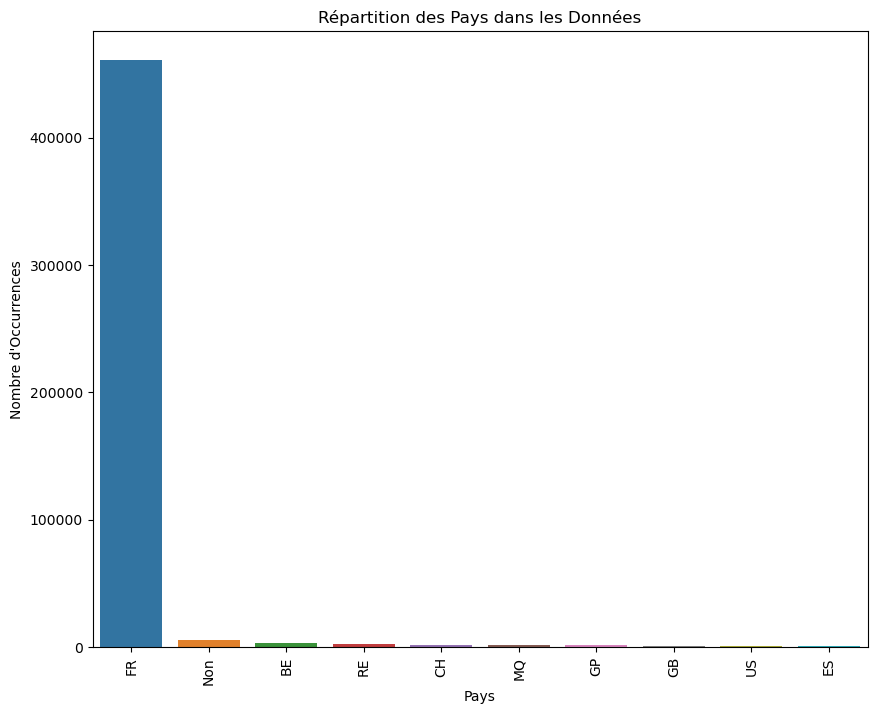

In [76]:
#Visualisation

 # Histogramme pour pays
VisualisationGeneral.diagramme_Pays(df_avis2['Pays'],10)


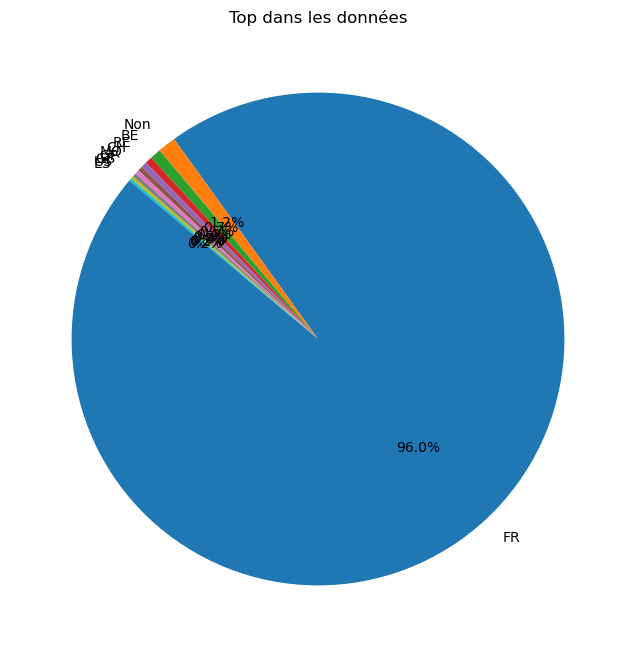

In [78]:
 # Pie_Chart_Pays
VisualisationGeneral.Pie_Chart_Pays(df_avis2['Pays'],10)


In [31]:
print(df_avis2["emoji_sentiment"].unique())

print(df_avis2["emojis"].unique())
print(df_avis2["emoji_counts"])
print(df_avis2["emoji_diversity"].unique())

[ 0.     -0.34    0.5574 -0.5859  0.3182  0.7096  0.8591 -0.875  -0.93
 -0.9451 -0.7351 -0.8176 -0.9081 -0.2263 -0.7579 -0.3612 -0.4939 -0.8225]
[nan '🌟🌟🌟🌟🌟' '👌🙏' ... '👏💪' '👌👍👏' '🤗😃👍🙏🙏😍👌👋']
0         Counter()
1         Counter()
2         Counter()
3         Counter()
4         Counter()
            ...    
487827    Counter()
487828    Counter()
487829    Counter()
487830    Counter()
487831    Counter()
Name: emoji_counts, Length: 487832, dtype: object
[ 0  1  2  3  4  5  6  8  7 10 13  9 20 11]


In [24]:
display(df_avis2['Langue'].unique())

array(['fr'], dtype=object)

In [32]:
df_avis2['Contenu_avis'].isna().sum()

0

In [35]:
df_avis2["emoji_diversity"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7, 10, 13,  9, 20, 11],
      dtype=int64)

In [33]:
df_avis2[df_avis2["emoji_diversity"]==11]

,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris,year,...,quotes,parentheses,combined_punctuation,uppercase_words,lowercase_words,uppercase_ratio,lowercase_ratio,topics,dominant_topic_id,dominant_service_topic
367964,mondial relay,jimmy,4,Non,5,2023-12-29 12:49:14+00:00,"8,9/10 satisfaisant et globalement pro",🟢 très bien :• prix du service ✅• impression (...,Non,2023,...,0,22,0,0,368,0.0,0.960836,"[(0, 0.50503224), (1, 0.35493782), (2, 0.02111...",0,"['Magasin de matériel de camping', 'Service lo..."


In [34]:
for text in df_avis2[df_avis2["emoji_diversity"] == 11]["Contenu_avis"]:
    print(text)

🟢 très bien :• prix du service ✅• impression (autocollante 🔝) du bon de livraison/transport,au point relais (pas besoin d’imprimante) ✅• système de commerçant point relais ✅• proximité et horaires d’ouverture du relais ✅🟡 à améliorer : • connaître l’heure à laquelle partent les colis du relais 🆙⬆️ (afin d’être plus précis et plus rapide pour déposer un colis et pour qu’il soit réceptionné,cela serait beaucoup plus efficient) (attention de trouver et de veiller à conserver la sécurité maximale en cas d’horaires connus ) • connaître avec précision le trajet du colis 📦 en temps réel 🆙⬆️(balise gps des camions de transport)• le livreur devrait prendre une photo (malgré le temps que cela représente surtout dans ce cœur de métier, ou la rapidité est de mise) de chaque colis lorsqu’il les prend en charge au point relais,et après qu’il les ai transportés,il devrait reprendre une autre photo au moment du dépôt dans le point relais final et de la fin de cette mission pour lui 🆙⬆️(permettrai au d

In [37]:
for text in df_avis2[df_avis2["emoji_diversity"] == 11]["emoji_text"]:
    print(text)

green_circle check_mark_button TOP_arrow check_mark_button check_mark_button check_mark_button yellow_circle UP!_button up_arrow package UP!_button up_arrow UP!_button up_arrow red_circle thinking_face exclamation_question_mark thinking_face exclamation_question_mark thinking_face exclamation_question_mark 


In [38]:
for text in df_avis2[df_avis2["emoji_diversity"] == 11]["emoji_sentiment"]:
    print(text)

0.0


In [39]:
print(df_avis[df_avis2["emoji_diversity"] == 11]["Note"])

367964    3
Name: Note, dtype: int64


C:\Users\Youcef Labib\AppData\Local\Temp\ipykernel_7072\3611444452.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_avis[df_avis2["emoji_diversity"] == 11]["Note"])


In [40]:
print(df_avis2[df_avis2["emoji_diversity"] == 11]["ServicesProposes"])
for text in df_avis2[df_avis2["emoji_diversity"] == 11]["ServicesProposes"]:
    print(text)

print(df_avis2[df_avis2["emoji_diversity"] == 11]["Nom_Entreprise"])

367964    ['Coursier', 'Coursier']
Name: ServicesProposes, dtype: object
['Coursier', 'Coursier']
367964    mondial relay
Name: Nom_Entreprise, dtype: object


In [45]:
print(df_avis2[df_avis2["emoji_diversity"] == 20]["topics"])
for text in df_avis2[df_avis2["emoji_diversity"] == 20]["dominant_service_topic"]:
    print(text)
## Nb::: A verfier  ????

print(df_avis2[df_avis2["emoji_diversity"] == 20]["ServicesProposes"])

for text in df_avis2[df_avis2["emoji_diversity"] == 20]["ServicesProposes"]:
    print(text)

331673    [(0, 0.42871103), (1, 0.5623346)]
Name: topics, dtype: object
['Magasin de matériel de camping', 'Service logistique', 'Magasin de vêtements professionnels', "Magasin d'équipements et accessoires pour la police", "Magasin de vêtements et d'articles de plein air", 'Service e-commerce', 'Magasin de matériel de camping', 'Service logistique', 'Magasin de vêtements professionnels', "Magasin d'équipements et accessoires pour la police", "Magasin de vêtements et d'articles de plein air", 'Service e-commerce']
331673    ['Coursier', 'Coursier']
Name: ServicesProposes, dtype: object
['Coursier', 'Coursier']


In [41]:
print(df_avis2[df_avis2["emoji_diversity"] == 20]["emoji_sentiment"])
print(df_avis2[df_avis2["emoji_diversity"] == 20]["Note"])

331673    0.0
Name: emoji_sentiment, dtype: float64
331673    1
Name: Note, dtype: int64


## Description de la Classe `Analayse_Sentiment_Processus`
Cette calsse est une classe prépartoire pour faire les annalyse de sentiement utérieurs 
l'inut de cette classe et la df produit dans l'etape précedente:::


## Description de la Classe `Analayse_Sentiment_Processus`

La classe `Analayse_Sentiment_Processus` est conçue pour le traitement approfondi des textes, spécialement dans le contexte des avis clients. Elle intègre plusieurs techniques de traitement du langage naturel (NLP) pour nettoyer, analyser et transformer le texte en données numériques exploitables par des modèles d'apprentissage automatique.

### Fonctionnalités Principales

- **Nettoyage et Prétraitement** : La classe prépare les données textuelles en nettoyant et en extrayant des caractéristiques pertinentes comme les emojis et les ponctuations. Elle convertit également les données textuelles en formats plus simples et homogènes pour faciliter les analyses ultérieures.

- **Analyse de Sentiment** : Utilise le module `VADER` de NLTK pour analyser le sentiment des avis, fournissant une évaluation quantitative du sentiment exprimé dans les textes.

- **Traitement des Emojis** : Les emojis sont extraits et convertis en texte pour une analyse de sentiment spécifique, reconnaissant leur importance croissante dans la communication numérique.

- **Extraction de Caractéristiques Textuelles** : La classe extrait des caractéristiques supplémentaires telles que le nombre et la diversité des emojis, la présence de ponctuations spécifiques, et les ratios d'utilisation des majuscules par rapport aux minuscules, enrichissant ainsi le dataset avec des informations qui peuvent être cruciales pour certaines analyses.

- **Vectorisation** : Transforme le texte nettoyé en vecteurs numériques à l'aide de `TfidfVectorizer`, permettant ainsi l'utilisation des données dans des modèles statistiques ou de machine learning.

### Méthodes Importantes

- `initialize_emoji_and_punctuation_columns()`: Prépare les colonnes pour les emojis et les ponctuations.
  
- `update_stop_words()`: Étend la liste des mots à exclure en incluant les emojis, les ponctuations et les chiffres, adaptant ainsi les stop words au contexte spécifique des données traitées.

- `token()`: Réalise la tokenisation des avis, en excluant les mots non pertinents et en préparant le texte pour l'analyse de sentiment.

- `reconstruct_sentences()`: Reconstruit les phrases à partir des tokens pour faciliter certaines formes d'analyses qui nécessitent le format de phrase complet.

- `apply_stem_or_lemma(use_stemming)`: Applique le stemming ou la lemmatisation pour réduire les mots à leur racine, facilitant une comparaison plus uniforme entre les différents usages des mots.

- `vectorize_text()`: Convertit les données textuelles traitées en vecteurs TF-IDF, une étape essentielle pour de nombreux algorithmes de machine learning.

### Exemple d'Utilisation

```python
df_avis = pd.read_csv("df_avis_TexteMining.csv")
print(df_avis.head())
sentiment_analyzer = Analayse_Sentiment_Processus(df_avis, 'Contenu_avis')
df_modified = sentiment_analyzer.preprocess_and_vectorize(use_stemming=True)
print(df_modified.head())
df_modified.to_csv('df_avis_AnalyseSentiment.csv', index=False)

In [53]:
# je commence ma presentation sur l"effets de cette classe seulement df stoké lors de l'etape de autoteste 

df_avis_Annalys= pd.read_csv("df_avis_AnalyseSentiment.csv")
display(df_avis_Annalys.head())
display(df_avis_Annalys.info())

display(df_avis_Annalys.isna().sum())

,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris,year,...,lowercase_words,uppercase_ratio,lowercase_ratio,topics,dominant_topic_id,dominant_service_topic,tokens,reconstructed,stemmed,vectorized
0,2atps,agathe,1,FR,5,2023-12-08 10:45:35+00:00,personnel réactif !!!,personnel réactif !!!! entreprise sérieuse qui...,Non,2023,...,11,0.0,0.916667,"[(0, 0.015919503), (1, 0.43787825), (2, 0.1280...",1,"['Magasin de matériel de camping', 'Service lo...","['personnel', 'réactif', 'entreprise', 'sérieu...",personnel réactif entreprise sérieuse respecte...,"['personnel', 'réactif', 'entrepris', 'sérieux...",[0. 0. 0. 0. 0...
1,2htransports,alexandre rif,2,FR,5,2024-04-08 01:40:55+00:00,j'ai demandé un transport pour aller de…,j'ai demandé un transport pour aller de paris ...,Non,2024,...,22,0.0,1.000000,"[(0, 0.3877065), (1, 0.39804453), (4, 0.196680...",1,"['Magasin de matériel de camping', 'Service lo...","['demandé', 'transport', 'aller', 'paris', 'ly...",demandé transport aller paris lyon bien passé ...,"['demand', 'transport', 'aller', 'paris', 'lyo...",[0. 0. 0. 0. 0...
2,2htransports,game lu,1,FR,5,2024-03-09 22:26:36+00:00,j'ai trouvé cette société de…,j'ai trouvé cette société de transporteur un p...,Non,2024,...,24,0.0,1.000000,"[(0, 0.36660075), (1, 0.4849809), (2, 0.047657...",1,"['Magasin de matériel de camping', 'Service lo...","['trouvé', 'cette', 'société', 'transporteur',...",trouvé cette société transporteur hasard satis...,"['trouv', 'cet', 'societ', 'transporteur', 'ha...",[0. 0. 0. 0. 0...
3,2htransports,sayosurmc,1,FR,5,2023-02-16 23:30:42+00:00,si vous recherchez un service de…,si vous recherchez un service de coursier prof...,Non,2023,...,103,0.0,0.990385,"[(0, 0.40743735), (1, 0.36786553), (3, 0.17513...",0,"['Magasin de matériel de camping', 'Service lo...","['recherchez', 'service', 'coursier', 'profess...",recherchez service coursier professionnel abor...,"['recherch', 'servic', 'coursi', 'professionne...",[0. 0. 0.19259367 0. 0...
4,2htransports,s d,2,FR,1,2023-10-03 23:01:28+00:00,ce monsieur nous a flingué une mission…,ce monsieur nous a flingué une mission humanit...,"Bonjour MD,Je suis désolé d'entendre votre déc...",2023,...,184,0.0,0.978723,"[(0, 0.4306029), (1, 0.45975393), (2, 0.077174...",1,"['Magasin de matériel de camping', 'Service lo...","['monsieur', 'flingué', 'mission', 'humanitair...",monsieur flingué mission humanitaire maroc dép...,"['monsieur', 'flingu', 'mission', 'humanitair'...",[0. 0. 0. 0. 0...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487832 entries, 0 to 487831
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Nom_Entreprise          487691 non-null  object 
 1   Nom_Client              487764 non-null  object 
 2   Nombre_avis             487832 non-null  int64  
 3   Pays                    487832 non-null  object 
 4   Note                    487832 non-null  int64  
 5   Date                    487832 non-null  object 
 6   Titre_avis              487787 non-null  object 
 7   Contenu_avis            487832 non-null  object 
 8   Réponse_Entrpris        487832 non-null  object 
 9   year                    487832 non-null  int64  
 10  month                   487832 non-null  int64  
 11  weekday                 487832 non-null  int64  
 12  weekend                 487832 non-null  int64  
 13  day                     487832 non-null  int64  
 14  hour                

None

Nom_Entreprise               141
Nom_Client                    68
Nombre_avis                    0
Pays                           0
Note                           0
Date                           0
Titre_avis                    45
Contenu_avis                   0
Réponse_Entrpris               0
year                           0
month                          0
weekday                        0
weekend                        0
day                            0
hour                           0
Langue                         0
ServicesProposes               0
text_sentiment                 0
emojis                         0
emoji_text                476297
emoji_sentiment                0
emoji_counts                   0
emoji_ratio                    0
emoji_diversity                0
punctuations                   0
exclamation_marks              0
question_marks                 0
exclamation_ratio              0
question_ratio                 0
ellipsis                       0
exclamatio

In [108]:
df_avis_Annalys[df_avis_Annalys['Nom_Entreprise']=='ID Logistics']

,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris,year,...,lowercase_words,uppercase_ratio,lowercase_ratio,topics,dominant_topic_id,dominant_service_topic,tokens,reconstructed,stemmed,vectorized


In [54]:
# Fonction pour vérifier si 'livraison' est dans la liste des services
def has_livraison(service_list):
    return 'livraison' in service_list

# Filtrer le DataFrame pour obtenir uniquement les entreprises offrant le service de livraison
filtered_df = df_avis_Annalys[df_avis_Annalys['ServicesProposes'].apply(has_livraison)]



In [55]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194184 entries, 0 to 487618
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Nom_Entreprise          194184 non-null  object 
 1   Nom_Client              194156 non-null  object 
 2   Nombre_avis             194184 non-null  int64  
 3   Pays                    194184 non-null  object 
 4   Note                    194184 non-null  int64  
 5   Date                    194184 non-null  object 
 6   Titre_avis              194159 non-null  object 
 7   Contenu_avis            194184 non-null  object 
 8   Réponse_Entrpris        194184 non-null  object 
 9   year                    194184 non-null  int64  
 10  month                   194184 non-null  int64  
 11  weekday                 194184 non-null  int64  
 12  weekend                 194184 non-null  int64  
 13  day                     194184 non-null  int64  
 14  hour                    1

In [56]:
filtered_df['Nom_Entreprise'].unique()

array(['2atps', '2htransports', 'ags déménagement', 'akaz',
       'apero le mans', 'asntransport paris', 'atradem',
       'ava déménagement', 'axal', 'best demenagements',
       'bonjour demenagement', 'bring4you', 'byebyecolis', 'cafeographe',
       'cliquezpostez', 'cocolis', 'colicoli', 'colis affranchis',
       'colisexpat', 'coursier-moto', 'crogo', 'delight cbd', 'demeclic',
       'demeco horizon demenagement et garde- meuble',
       'demenagement lefebvre', 'demenageur', 'demepool', 'demtrans i2s',
       'dpd', 'déménagement service', 'déménagementgabin',
       'déménagements jézéquel', 'déménager malin', 'edilink',
       'excello mobilis déménagement', 'famileat', 'fideliv', 'fraise',
       'fretbay', 'frichti', 'gls france', 'go pilot', 'green kartel',
       'happy-post', 'hoplunch', 'jenlevejelivre', 'kingbox', 'koulier',
       "l'officiel du déménagement", 'la bigbox', 'la tournée',
       'les déménageurs bretons', 'lessaveursdenoemie', 'lettre24',
       'livr

In [57]:
# Liste des noms d'entreprises à filtrer
entreprises = ['cocolis', 'colisexpat', 'colicoli', 'stls - société de transport']

# Filtrer le DataFrame pour inclure uniquement les entreprises spécifiées
df_clois = filtered_df[filtered_df['Nom_Entreprise'].isin(entreprises)]

# Afficher le DataFrame résultant


In [58]:
df_clois.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51930 entries, 153097 to 210758
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nom_Entreprise          51930 non-null  object 
 1   Nom_Client              51914 non-null  object 
 2   Nombre_avis             51930 non-null  int64  
 3   Pays                    51930 non-null  object 
 4   Note                    51930 non-null  int64  
 5   Date                    51930 non-null  object 
 6   Titre_avis              51919 non-null  object 
 7   Contenu_avis            51930 non-null  object 
 8   Réponse_Entrpris        51930 non-null  object 
 9   year                    51930 non-null  int64  
 10  month                   51930 non-null  int64  
 11  weekday                 51930 non-null  int64  
 12  weekend                 51930 non-null  int64  
 13  day                     51930 non-null  int64  
 14  hour                    51930 non-nul

In [ ]:
## Nb::: quand je reconstruit les phrase apres avoir supprimer les mot vide :::: il prduite reconstructed  77 nan
# en fait, j'ai utiliser la technique de regressionExp pour limiter aux mot plus de 4 lettre  ::::::!!!! (a vérifier par la suite !!)

In [58]:
print("\n Contenu_avis \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["Contenu_avis"]:
    print(text)

print("\n tokens \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["tokens"]:
    print(text)
print("\n reconstructed \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["reconstructed"]:
    print(text)
    

print(df_avis2[df_avis2["emoji_diversity"] == 20]["Note"])
print(df_avis2[df_avis2["emoji_diversity"] == 20]["text_sentiment"]) 


print("\n stemmed  \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["stemmed"]:
    print(text)

print("\n ServicesProposes  \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["ServicesProposes"]:
    print(text)
print("\n emoji_sentiment  \n ")
print(df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["emoji_sentiment"])

print("\n topics  \n ")
print(df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["topics"])
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["topics"]:
    print(text)
print("\n dominant_service_topic  \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["dominant_service_topic"]:
    print(text)



 Contenu_avis 
 
service vraiment lamentable, le courrier arrivait plus vite au 20ème siècle!!! la poste veut faire banque et assurance alors qu'elle ne maîtrise pas son vrai métier, à savoir livrer du courrier. l'etat va lui donner plus d'un milliard d'euros et les timbres vont augmenter, alors que le j+2 passe en j+3!!!!! c'est honteux !!!!!!!!!!!!!! je pense faire appel à des messagers à cheval ou élever des pigeons voyageurs pour leur faire concurrence 😁🤣😵😬😭😒🥴🥳🤯🤒😷🤕🤢🤮🤧🥵🥶🤐🤪🙃

 tokens 
 
['service', 'vraiment', 'lamentable', 'courrier', 'arrivait', 'plus', 'vite', '20ème', 'siècle', 'poste', 'veut', 'faire', 'banque', 'assurance', 'alors', 'maîtrise', 'vrai', 'métier', 'savoir', 'livrer', 'courrier', 'etat', 'donner', 'plus', 'milliard', 'euros', 'timbres', 'vont', 'augmenter', 'alors', 'passe', 'honteux', 'pense', 'faire', 'appel', 'messagers', 'cheval', 'élever', 'pigeons', 'voyageurs', 'faire', 'concurrence']

 reconstructed 
 
service vraiment lamentable courrier arrivait plus vi

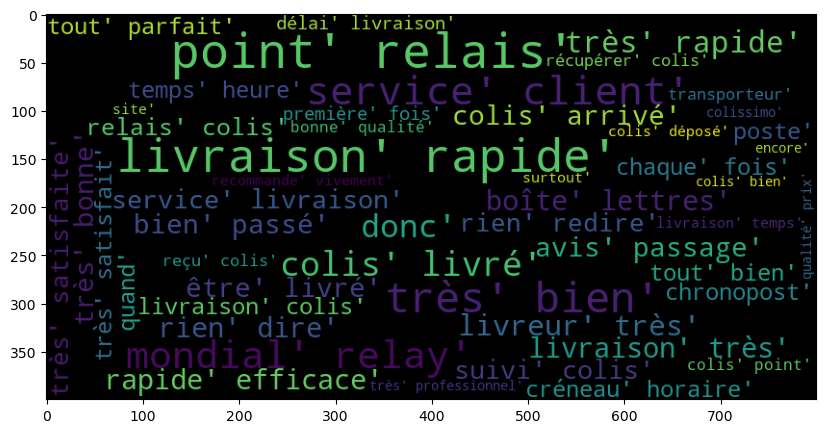

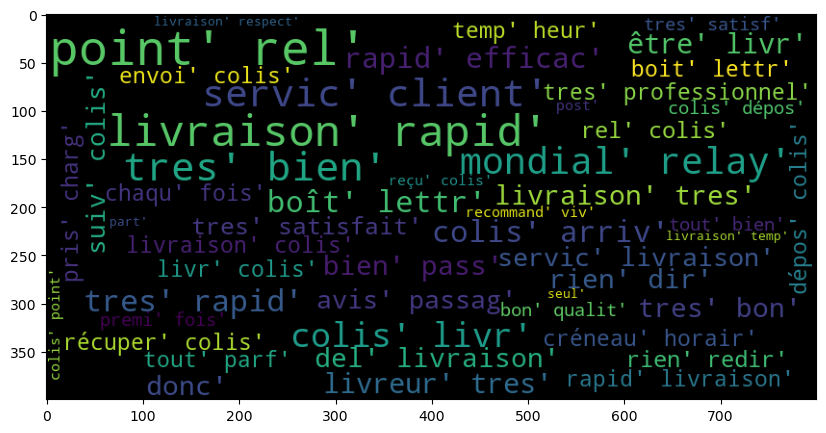

In [62]:
from VisualisationMap import VisualisationGeneral
VisualisationGeneral.plot_word_cloud(df_avis_Annalys, 'tokens')
VisualisationGeneral.plot_word_cloud(df_avis_Annalys, 'stemmed')

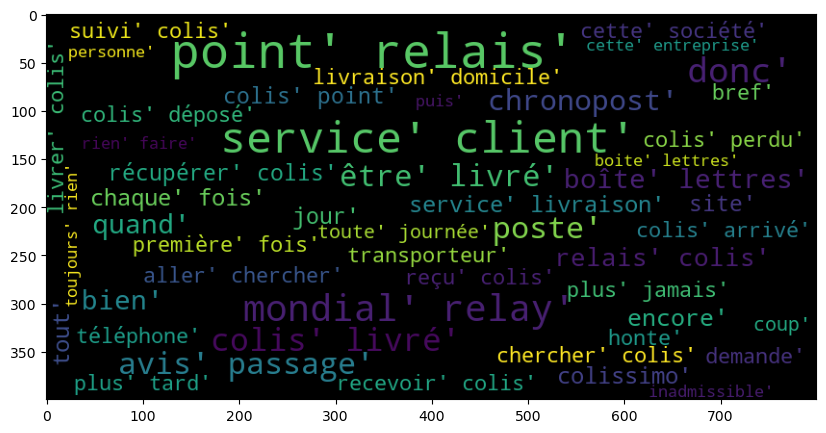

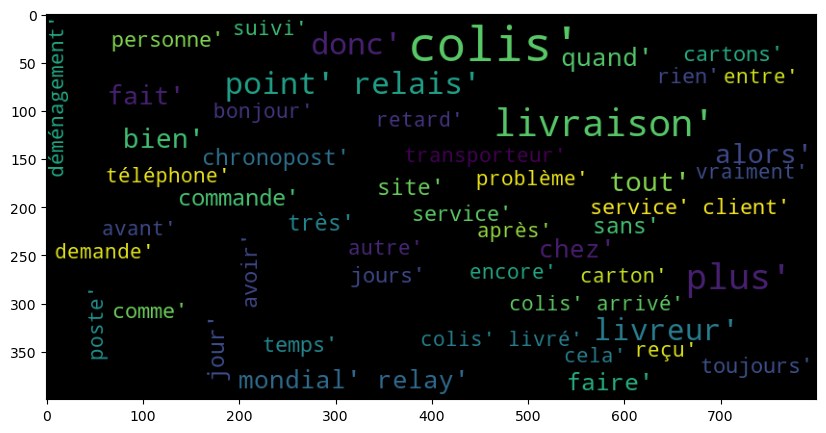

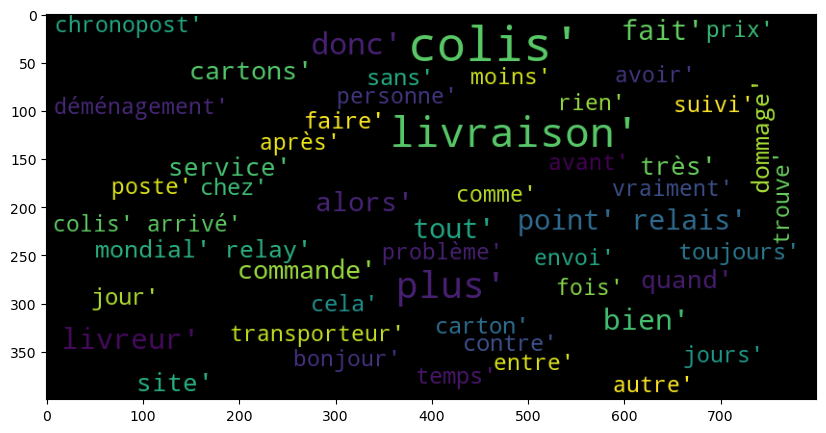

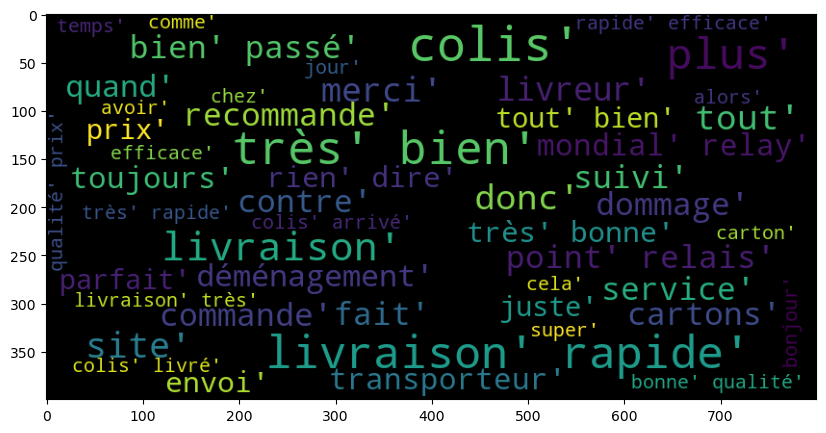

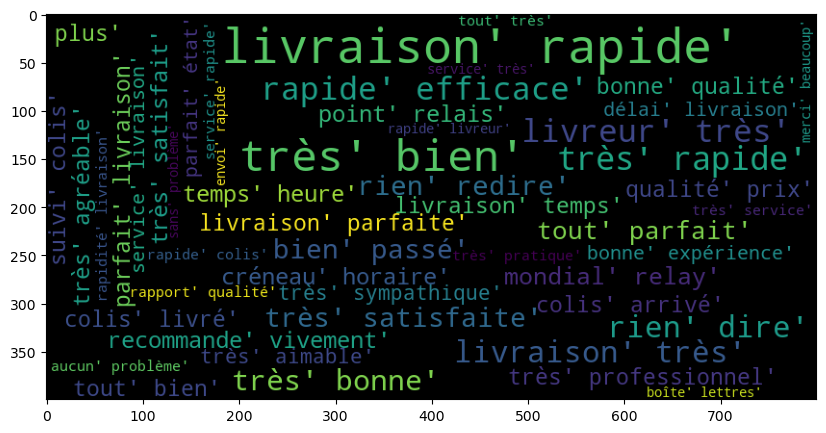

In [63]:
# neuge de poit pour chque note 

# Création des nuages de mots pour chaque note de 1 à 5
for i in range(1, 6):
    df_note = df_avis_Annalys[df_avis_Annalys["Note"] == i]
    VisualisationGeneral.plot_word_cloud(df_note, 'tokens')
